In [2]:
%matplotlib inline
from scipy.stats import rv_continuous
from scipy.special import gamma
import numpy as np
from numpy import exp, sqrt
from scipy.integrate import quad
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
import hast
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe

In [36]:
path = "/data/MIB/anunez/NewSchool/Andorra/An_box25Mpc_dmo_Z_halo1/output_00041"
mydmo = wkbl.Galaxy_Hound(path,"halo")

loading Dark matter..


In [9]:
myhalo.r_virial(800)

In [37]:
r_p = np.logspace(-0.5, np.log10(myhalo.r200),60)
def sph_dens(r):
    """
    spherical density profile
    """
    total_mass = np.sum(myhalo.dm.mass[(myhalo.dm.r < r)])
    dens = 4 * total_mass / 3. / np.pi / r**3
    return dens

def cyl_dens(r):
    """
    cylindrical density profile
    """
    total_mass = np.sum(myhalo.dm.mass[(myhalo.dm.R < r)])
    dens = 4 * total_mass / np.pi**2 / r**3
    return dens
    

get_shp_dens = np.vectorize(sph_dens)
get_cyl_dens = np.vectorize(cyl_dens)

sph_profile = get_shp_dens(r_p)
cyl_profile = get_cyl_dens(r_p)

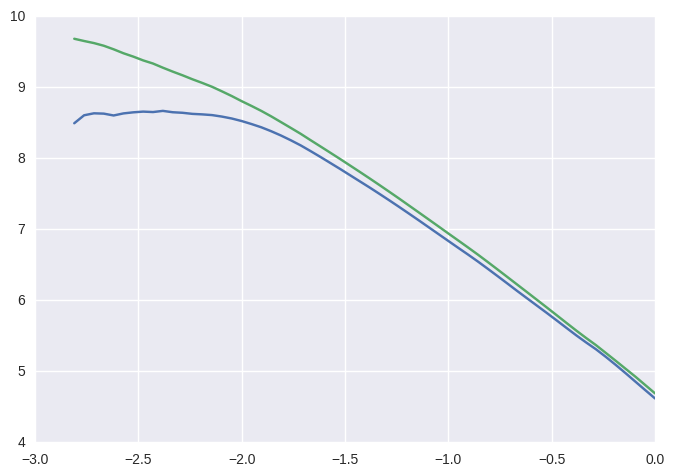

In [38]:
fig , ax = plt.subplots()
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(np.log10(r_p/myhalo.r200),np.log10(sph_profile))
ax.plot(np.log10(r_p/myhalo.r200),np.log10(cyl_profile))

In [44]:
rmin, rmax = 7., 9.
thinckenss = 3
ring_condition = (myhalo.dm.R > rmin)&(myhalo.dm.R < rmax)&(abs(myhalo.dm.pos3d[:,2]) > thinckenss)
shell_condition = (myhalo.dm.r > rmin)&(myhalo.dm.r < rmax)

vphi_shell = myhalo.dm.vphi[shell_condition]
vr_shell = myhalo.dm.vr[shell_condition]

vphi_ring = myhalo.dm.vphi[ring_condition]
vR_ring = myhalo.dm.vR[ring_condition]

In [60]:
def beta_shell(r):
    shell_condition = (myhalo.dm.r > r-1)&(myhalo.dm.r < r+1)
    vphi_shell = myhalo.dm.vphi[shell_condition]
    vr_shell = myhalo.dm.vr[shell_condition]
    sigmaT_shell = np.std(vphi_shell)
    sigmar_shell = np.std(vr_shell)
    return 1-(sigmaT_shell/sigmar_shell)

get_beta_shell = np.vectorize(beta_shell)
    
def beta_ring(r):
    ring_condition = (myhalo.dm.R > r-2.)&(myhalo.dm.R < r+2.)&(abs(myhalo.dm.pos3d[:,2]) > 5.)
    vphi_ring = myhalo.dm.vphi[ring_condition]
    vR_ring = myhalo.dm.vR[ring_condition]
    sigmaT_ring = np.std(vphi_ring)
    simgaR_ring = np.std(vR_ring)
    
get_beta_ring = np.vectorize(beta_ring)



In [61]:
r_sample = np.arange(0,myhalo.r200,4)
beta_in_shell = get_beta_shell(r_sample)
beta_in_ring = get_beta_ring(r_sample)

In [62]:
print beta_in_ring

[None None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None None
 None None None None None None None]


In [4]:
fig, ax = plt.subplots(figsize=[6,6])

#ax.plot(r_sample,beta_in_ring)
ax.plot(r_sample,beta_in_shell)


NameError: name 'plt' is not defined